# <center> IMPLEMENTASI LOGIKA FUZZY MAMDANI UNTUK MENENTUKAN HARGA GABAH

Dalam penentuan harga gabah, aplikasi logika fuzzy melakukan proses
mengubah input yang berupa kadar air dan kadar hampa/kotoran sehingga
mendapatkan output berupa harga kualitas. Kemudian disesuaikan dengan
range keanggotaan pada variabel harga kualitas sehingga diperoleh harga
gabah. Dalam penentuan harga gabah digunakan metode Mamdani atau sering
juga dikenal dengan nama Metode Min - Max. Dalam metode ini, pada setiap
aturan yang berbentuk implikasi (“sebab-akibat”) anteseden yang berbentuk
konjungsi (AND) mempunyai nilai keanggotaan berbentuk minimum (min),
sedangkan konsekuen gabungannya berbentuk maksimum (max). Jadi dalam
tahapan-tahapan untuk membangun Logika Fuzzy ini meliputi: Fuzzifikasi ,
Basis Pengetahuan, Mesin Inferensi, dan Defuzzifikasi.

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#### <center> Semesta Pembicaraan 
Fungsi | Nama Variabel | Semesta Pembicara
--- | --- | ---
Input     | Kadar Air     | [1 – 50] 
Input     | Kadar Hampa     | [1 – 20]
Output    | Harga Kualitas     | [3500 – 5000]

In [4]:
# Masukkan Variabel Batasan
x_air = np.arange(1, 51, 1)
x_hampa = np.arange(1, 21, 1)
x_harga  = np.arange(3501, 5001, 1)

#### <center> Himpunan Fuzzy Kadar Air Untuk Input 1 
| Variabel Himpunan | Range
|        ---        | ---
| Rendah     | 1 - 14
| Sedang     | 13 - 25
| Tinggi     | 23 - 50

In [5]:
air_lo = fuzz.trapmf(x_air, [1, 1, 13, 14])
air_md = fuzz.trimf(x_air, [12, 19, 25])
air_hi = fuzz.trapmf(x_air, [23, 30, 50, 50])

#### <center> Himpunan Fuzzy Kadar Hampa Untuk Input 2 
| Variabel Himpunan | Range
|        ---        | ---
| Sedikit     | 1 - 3
| Sedang     | 2 - 10
| Banyak     | 8 - 20

In [6]:
hampa_lo = fuzz.trapmf(x_hampa, [1, 1, 2, 3])
hampa_md = fuzz.trimf(x_hampa, [2, 6, 10])
hampa_hi = fuzz.trapmf(x_hampa, [8, 12, 20, 20])

#### <center> Himpunan Fuzzy Harga Kualitas untuk Output 
| Variabel Himpunan | Range
|        ---        | ---
| Rendah     | 3500 - 4100
| GKP     | 4000 - 4700
| GKG     | 4500 – 5000 

In [7]:
harga_lo = fuzz.trapmf(x_harga, [3500, 3500, 3750, 4100])
harga_md = fuzz.trimf(x_harga, [4000, 4400, 4700])
harga_hi = fuzz.trapmf(x_harga, [4500, 5000, 5000, 5000])

Persamaan himpunan fuzzy Kadar Air untuk rendah  : 

$µr(Rendah) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 13  \\
       14-x/14-13 & \mbox{; }  13 ≤ x ≤ 14  \\
       0 & \mbox{; } x ≥ 14 
    \end{array}
\right.$

Persamaan himpunan fuzzy Kadar Air untuk sedang  : 

$µr(Sedang) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 13  \\
       x-13/19-13 & \mbox{; }  13 ≤ x ≤ 19  \\
       25-x/25-19 & \mbox{; } 19 ≤ x ≤ 25 
    \end{array}
\right.$

Persamaan himpunan fuzzy Kadar Air untuk Tinggi  : 

$µr(Tinggi) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 23  \\
       x-23/30-23 & \mbox{; }  23 ≤ x ≤ 30  \\
       1 & \mbox{; } x ≥ 14 
    \end{array}
\right.$

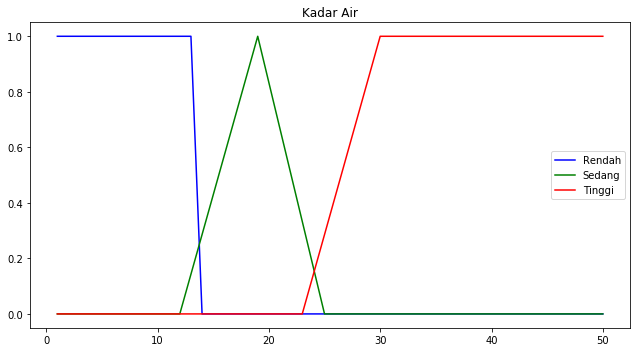

In [8]:
fig, (ax0) = plt.subplots(nrows=1, figsize=(9, 5))

ax0.plot(x_air, air_lo, 'b', linewidth=1.5, label='Rendah')
ax0.plot(x_air, air_md, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_air, air_hi, 'r', linewidth=1.5, label='Tinggi')
ax0.set_title('Kadar Air')
ax0.legend()
plt.tight_layout()

Persamaan himpunan fuzzy Kadar Hampa untuk Sedikit  : 

$µr(Sedikit) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 2  \\
       3-x/3-2 & \mbox{; }  2 ≤ x ≤ 3  \\
       0 & \mbox{; } x ≥ 3 
    \end{array}
\right.$

Persamaan himpunan fuzzy Kadar Hampa untuk Sedang  : 

$µr(Sedang) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 2  \\
       x-2/6-2 & \mbox{; }  2 ≤ x ≤ 6  \\
       10-x/10-6 & \mbox{; } 6 ≤ x ≤ 10 
    \end{array}
\right.$

Persamaan himpunan fuzzy Kadar Hampa untuk Banyak  : 

$µr(Banyak) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 8  \\
       x-8/12-8 & \mbox{; }  8 ≤ x ≤ 12  \\
       1 & \mbox{; } x ≥ 12 
    \end{array}
\right.$

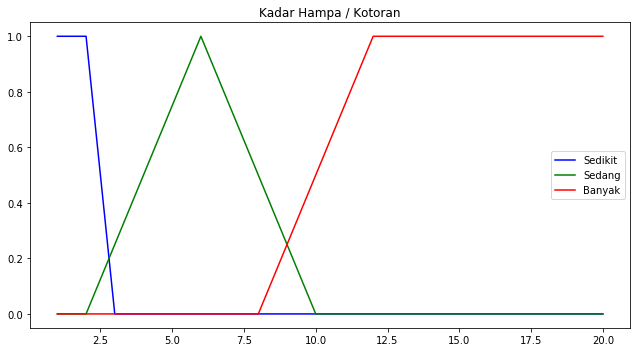

In [9]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(9, 5))
ax1.plot(x_hampa, hampa_lo, 'b', linewidth=1.5, label='Sedikit')
ax1.plot(x_hampa, hampa_md, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_hampa, hampa_hi, 'r', linewidth=1.5, label='Banyak')
ax1.set_title('Kadar Hampa / Kotoran')
ax1.legend()
plt.tight_layout()

Persamaan himpunan fuzzy Harga Kualitas untuk Rendah  : 

$µr(Rendah) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 3750  \\
       4100-x/4100-3750 & \mbox{; }  3750 ≤ x ≤ 4100  \\
       0 & \mbox{; } x ≥ 4100 
    \end{array}
\right.$

Persamaan himpunan fuzzy Harga Kualitas untuk GKP  : 

$µr(GKP) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 4000  \\
       x-4000/4400-4000 & \mbox{; }  4000 ≤ x ≤ 4400  \\
       4700-x/4700-4400 & \mbox{; } 4400 ≤ x ≤ 4700 
    \end{array}
\right.$

Persamaan himpunan fuzzy Harga Kualitas untuk GKG  : 

$µr(GKG) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 4500  \\
       x-4500/5000-4500 & \mbox{; }  4500 ≤ x ≤ 5000  \\
       1 & \mbox{; } x ≥ 5000 
    \end{array}
\right.$

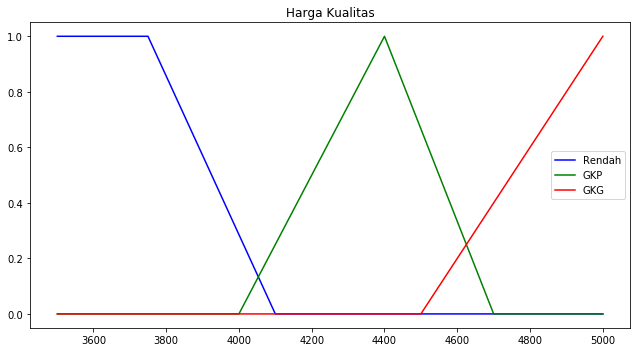

In [10]:
fig, (ax2) = plt.subplots(nrows=1, figsize=(9, 5))
ax2.plot(x_harga, harga_lo, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_harga, harga_md, 'g', linewidth=1.5, label='GKP')
ax2.plot(x_harga, harga_hi, 'r', linewidth=1.5, label='GKG')
ax2.set_title('Harga Kualitas')
ax2.legend()
plt.tight_layout()

Dari dua input dan satu output fuzzy tersebut. Rule yang diperoleh adalah 9 rule, yang ditetapkan berdasarkan input dan output. 

#### <center> Pembentukan Rule 

NO | Kadar Air | Kadar Hampa | Harga Kualitas
--- | --- | --- | ---
1  | Rendah     | Sedikit     | GKG
2  | Rendah     | Sedang     | GKP
3  | Rendah     | Banyak     | Rendah
4  | Sedang     | Sedikit     | GKP
5  | Sedang     | Sedang     | GKP
6  | Sedang     | Banyak     | Rendah
7  | Tinggi     | Sedikit     | Rendah
8  | Tinggi     | Sedang     | Rendah
9  | Tinggi     | Banyak     | Rendah

## Kasus
Setelah aturan dibentuk,  Pada Metode Mamdani, fungsi implikasi
yang digunakan adalah MIN, yang berarti tingkat keanggotaan yang didapat
sebagai konsekuen dari proses ini adalah nilai minimum dari variabel kadar air
dan kadar hampa/kotoran. Sehingga didapatkan daerah fuzzy pada variabel
harga kualitas untuk masing – masing aturan.
Dilakukan percobaan dengan memberikan input Air 12,20% dan
Kadar Hampa/Kotoran 2,13% maka didapatkan hasil dengan rincian dibawah
ini

α_predikat 1 = μkadarAirRendah ∩ μkadarHampa/kotoranSedikit

            = min (μkadarAirRendah (12.2) ∩ μkadarHampa/kotoran Sedikit(2,13))

            = min(1,8 ; 0,87) = 0,87

α_predikat 2 = μkadarAirRendah ∩ μkadarHampa/kotoranSedang

             = min (μkadarAirRendah (12.2) ∩ μkadarHampa/kotoran Sedang(2,13))

             = min(1,8 ; 0,0325) = 0,0325

Dengan demikian, fungsi keanggotaan untuk hasil komposisi ini
adalah:

$µ = 
\left\{
    \begin{array}{ll}
       0.0325 & \mbox{; } 4000 ≤ x ≥ 4516.25  \\
       (x-4500)500 & \mbox{; }  4516.25 ≤ x ≤ 4935  \\
       0.87 & \mbox{; } x ≥ 4935 
    \end{array}
\right.$

Derajat keanggotaan Kadar Air
Rendah =  1.0
Sedang =  0.02857142857142847
Tinggi =  0.0

Derajat keanggotaan Kadar Hampa
Sedikit =  0.8700000000000001
Sedang =  0.03249999999999997
Banyak =  0.0

Fungsi Implikasinya

RULE 1 = 0.8700000000000001
RULE 2 = 0.03249999999999997
RULE 3 = 0.0
RULE 4 = 0.02857142857142847
RULE 5 = 0.02857142857142847
RULE 6 = 0.0
RULE 7 = 0.0
RULE 8 = 0.0
RULE 9 = 0.0


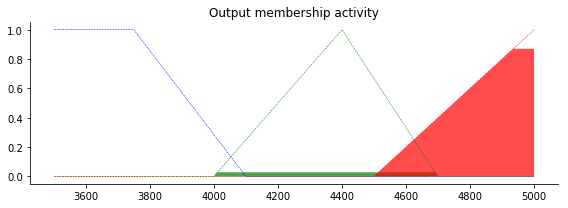

In [14]:
air_level_lo = fuzz.interp_membership(x_air, air_lo, 12.2)
air_level_md = fuzz.interp_membership(x_air, air_md, 12.2)
air_level_hi = fuzz.interp_membership(x_air, air_hi, 12.2)

hampa_level_lo = fuzz.interp_membership(x_hampa, hampa_lo, 2.13)
hampa_level_md = fuzz.interp_membership(x_hampa, hampa_md, 2.13)
hampa_level_hi = fuzz.interp_membership(x_hampa, hampa_hi, 2.13)

print('Derajat keanggotaan Kadar Air')
print('Rendah = ',air_level_lo)
print('Sedang = ',air_level_md)
print('Tinggi = ',air_level_hi)
print('')
print('Derajat keanggotaan Kadar Hampa')
print('Sedikit = ',hampa_level_lo)
print('Sedang = ',hampa_level_md)
print('Banyak = ',hampa_level_hi)

#rule
rule1 = np.fmin(air_level_lo, hampa_level_lo)
rule2 = np.fmin(air_level_lo, hampa_level_md)
rule3 = np.fmin(air_level_lo, hampa_level_hi)
rule4 = np.fmin(air_level_md, hampa_level_lo)
rule5 = np.fmin(air_level_md, hampa_level_md)
rule6 = np.fmin(air_level_md, hampa_level_hi)
rule7 = np.fmin(air_level_hi, hampa_level_lo)
rule8 = np.fmin(air_level_hi, hampa_level_md)
rule9 = np.fmin(air_level_hi, hampa_level_hi)


print("")
print("Fungsi Implikasinya")
print("")
print("RULE 1 =", rule1)
print("RULE 2 =", rule2)
print("RULE 3 =", rule3)
print("RULE 4 =", rule4)
print("RULE 5 =", rule5)
print("RULE 6 =", rule6)
print("RULE 7 =", rule7)
print("RULE 8 =", rule8)
print("RULE 9 =", rule9)

# Visualize this
harga_activation_hi = np.fmin(rule1, harga_hi)
harga_activation_md = np.fmin(rule2, harga_md)
harga_activation_lo = np.fmin(rule3, harga_lo)
harga_activation_md = np.fmin(rule4, harga_md)
harga_activation_md = np.fmin(rule5, harga_md)
harga_activation_lo = np.fmin(rule6, harga_lo)
harga_activation_lo = np.fmin(rule7, harga_lo)
harga_activation_lo = np.fmin(rule8, harga_lo)
harga_activation_lo = np.fmin(rule9, harga_lo)
harga0 = np.zeros_like(x_harga)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_harga, harga0, harga_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_harga, harga_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_harga, harga0, harga_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_harga, harga_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_harga, harga0, harga_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_harga, harga_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Defuzzifikasi
Metode Defuzzy yang digunakan adalah metode centroid maka dari
contoh diatas rincian perhitungan sebagai berikut :

### $COG = 
\left\{
    \begin{array}{ll}
       {(280912.125+2297310.878+691188.818) \over 56.55+607.711+16.356} = {3269411,821\over680.617} = {4803.6}\\
    \end {array}
\right.$}

Dari proses-proses fuzzyfikasi hingga defuzzyfikasi yang sudah
dilakukan diatas dengan memberikan sampel yang harus dihitung sehingga
didapatkan harga kualitas gabah, setelah dilakukan penerapan logika fuzzy
akhirnya didapatkan harga Rp 4803,6. Hasilnya masih ada di range Harga
Kualitas GKG (4500-5000) dan itu berarti hasil yang didapat sudah sesuai
dengan aturannya.

Agregasi :  [0.   0.   0.   ... 0.87 0.87 0.87]


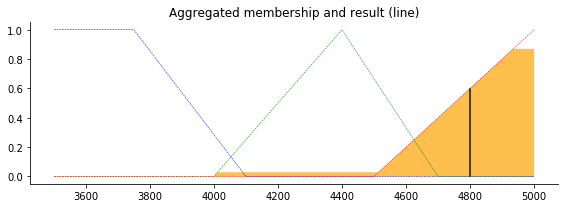

In [23]:
# Aggregate all three output membership functions together
aggregated = np.fmax(harga_activation_lo,
                     np.fmax(harga_activation_md, harga_activation_hi))

# Calculate defuzzified result
harga = fuzz.defuzz(x_harga, aggregated, 'centroid')
harga_activation = fuzz.interp_membership(x_harga, aggregated, harga) 

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_harga, harga_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_harga, harga_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_harga, harga_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_harga, harga0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([harga, harga], [0, harga_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print("Agregasi : ", aggregated)

In [22]:
harga

4799.202821976035

Terdapat Perbedaan Nilai dengan hitung manual dan hitung phyton yang dimana 

manual mendapatkan nilai = 4803.6 sedangkan phyton 4799.202821976035

## Kesimpulan

Penentuan harga gabah ini dapat diterapkan logika fuzzy mamdani.
Dengan ini para petani ataupun pembeli dapat menggunakan sistem ini
sebagai refensi untuk membantu menentukan harga gabahnya, karena harga
yang dihasilkan pada sistem ini sudah bisa dikatakan sesuai dengan harga
gabah di pasaran. Jadi jika petani maupun pembeli menerapkan harga dari
sistem ini harga yang diterapkan sudah sesuai dengan kualitas gabah yang
akan dijual.